In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.special as sc
import pandas as pd
import math 

# Формула, связывающая коэффициенты пьезопроводности, проницаемости и упрогоемкости пласта.
## Формула (3.44) стр 121
$$ Q_\xi = \dfrac{V_ж}{Г(\dfrac{1+\alpha}{2})}\dfrac{(\dfrac{\xi^2}{4\kappa t})^{\dfrac{1+\alpha}{2}}}{t}\exp^{-\dfrac{\xi^2}{4\kappa t}}$$

In [3]:
def q_xi_a(a, t, xi, v_liq=1e2, k=3e-4):
    # V_ж - [m^3] - объемн жидкости
    # k - [м^2/с] - пьезопроводность пласта
    # t -[c] - время
    # xi -[м] - расстояние
    return v_liq / sc.gamma((1 + a) / 2) * (xi ** 2 / (4 * k * t)) ** ((1 + a) / 2)/ t * np.exp(-xi ** 2 / 4 / k / t)

## Формула (3.48) стр. 122
$$ V_\xi = \dfrac{V_ж}{Г(\dfrac{1+\alpha}{2})}Г(\dfrac{1+\alpha}{2},\dfrac{\xi^2}{4\kappa t})$$

In [4]:
def v_xi_a(a, t, xi, v_liq=1e2, k=3e-4):
    # V_ж - [m^3] - объемн жидкости
    # k - [м^2/с] - пьезопроводность пласта
    # t -[c] - время
    # xi -[м] - расстояние
    return v_liq/sc.gamma((1 + a) / 2) * sc.gamma((1 + a)/2)*(1-sc.gammainc((1 + a)/2, xi ** 2 / 4 / k / t))

In [5]:
#ВАЖНО
#Неполная гамма функция для sc
sc.gamma(1/2)*(1-sc.gammainc(1/2,1))

0.2788055852806615

# $$\alpha = 1$$
# Плоско-радиальный поток к линейному стоку с постоянным дебитом

## Фундаментальное решение для уравнения пьезопроводности для случая плоско-радиального потока 
### Формула (3.29) стр 111
$$ \Delta P = ± \dfrac{V_ж}{4 b \pi \kappa t\beta^*} \exp^{-\dfrac{\xi^2}{4\kappa t}} $$




In [6]:
def deltaP_1(t, xi, v_liq=1e2, betta=0.0003, k=3e-4, b=10):
    # v_liq -[м^3]- объем жидкости, извлеченной из пласта
    # betta -[1/МПа]- коэффициент упругоемкости пласта
    # k -[м^2/c]- пьезопроводность
    # t -[c]- время
    # xi -[м]- расстояние
    # b -[м]- толщина пласта
    return v_liq / (4 * b * 3.14 * k * t * betta) * np.exp(-xi ** 2 / 4 / k / t)

# Работа с постоянным дебитом

## Формула, позволяющая определить понижение давления в любой момент времени в любой точке пласта после пуска точечного стока с постоянным дебитом
### Формула (4.11) стр. 130
$$\Delta p = \dfrac{Q_c \mu }{4 \pi b Г(1) k} Г(0,\dfrac{\xi^2}{4\kappa t})$$

### Формула (4.14) стр. 131
$$\Delta p = \dfrac{Q_c \mu }{4 \pi b k}[-Ei(-\dfrac{\xi^2}{4\kappa t})]$$

In [7]:
def deltaP_Qc_1(t, xi, qc=0.001, mu=5e-4, betta=0.0003, k=3e-4,kpr=1e-11, b=10):
    # Qc - [m^3/с] - объемный дебит жидкости
    # mu - [Pa*c] - вязкость
    # betta -[1/МПа]- коэффициент упругоемкости пласта
    # k -[м^2/c]- пьезопроводность
    # kpr - [м^2] - проницаемость
    # t -[c]- время
    # xi -[м]- расстояние
    # b - толщина пласта
    return qc * mu / (4 * 3.14 * b * kpr) * (-sc.expi(-xi ** 2 / 4 / k / t))

## Расаход. жидкости $$Q_\xi$$  через поперечное сечение потока $$ \xi = const $$
### Формула (4.20) стр. 132
$$Q_\xi=Q_c \exp^\dfrac{\xi^2}{4\kappa t}$$

In [8]:
def q_xi_Qc_1(t, xi, qc=0.001, k=3e-4):
    # qc - [m^3/с] - объемный дебит жидкости
    # k -[м^2/c]- пьезопроводность
    # t -[c]- время
    # xi -[м]- расстояние
    return qc * np.exp(-xi ** 2 / 4 / k / t)

## Количество жидкости, которая к моменту времени t протечет через постоянное сечение потока
### Формула (4.29) стр. 134
$$ V_\xi = Q_c* t *(exp^{-\dfrac{\xi^2}{4\kappa t} } - \dfrac{\xi^2}{4\kappa t}[-Ei({-\dfrac{\xi^2}{4\kappa t} })])$$



In [10]:
def v_xi_Qc_1(t, xi, qc=0.001, k=3e-4):
    # qc - [m^3/с] - объемный дебит жидкости
    # k -[м^2/c]- пьезопроводность
    # t -[c]- время
    # xi -[м]- расстояние
    return qc * t *(np.exp(-(xi ** 2 / 4 / k / t)) - (xi ** 2 / 4 / k / t) * (-sc.expi(-xi ** 2 / 4 / k / t)))

## График понижения пластового давления
## рис 4.2

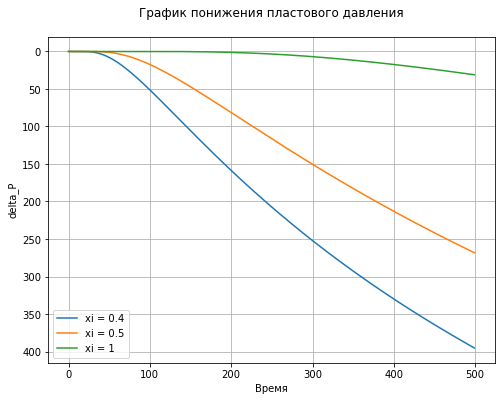

In [11]:
t = np.arange(1e-10,500,1)
xi_1 = 0.4
xi_2 = 0.5
xi_3 = 1


fig,ax1 = plt.subplots(1,1) 
fig.set_size_inches(8, 6)
ax1.plot(t,deltaP_Qc_1(t,xi_1), label = 'xi = {}'.format(xi_1))
ax1.plot(t,deltaP_Qc_1(t,xi_2), label = 'xi = {}'.format(xi_2))
ax1.plot(t,deltaP_Qc_1(t,xi_3), label = 'xi = {}'.format(xi_3))


ax1.grid()
ax1.set_xlabel("Время")
ax1.set_ylabel("delta_P")
plt.gca().invert_yaxis()
ax1.set_title('''График понижения пластового давления''',
                loc = 'center',     #  значение по умолчанию
                pad = 20)


ax1.legend()
plt.show()

## График пьезометрических линий в различные моменты времени
## рис. 4.5

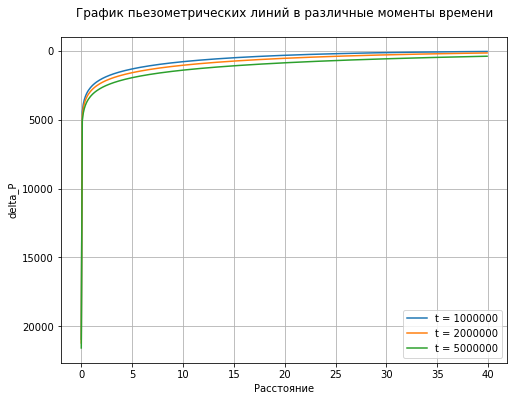

In [12]:
xi = np.arange(1e-10,40,0.1)
t_1 = 1000000
t_2 = 2000000
t_3 = 5000000

fig,ax1 = plt.subplots(1,1) 
fig.set_size_inches(8, 6)
plt.gca().invert_yaxis()
ax1.plot(xi,deltaP_Qc_1(t_1,xi), label = 't = {}'.format(t_1))
ax1.plot(xi,deltaP_Qc_1(t_2,xi), label = 't = {}'.format(t_2))
ax1.plot(xi,deltaP_Qc_1(t_3,xi), label = 't = {}'.format(t_3))


ax1.grid()
ax1.set(title = "")
ax1.set_xlabel("Расстояние")
ax1.set_ylabel("delta_P")
ax1.legend()
ax1.set_title('''График пьезометрических линий в различные моменты времени''',
                loc = 'center',     #  значение по умолчанию
                pad = 20)

plt.show()

## Графики  расходов жидкости, протекающих через различные сечения
## рис. 4.7

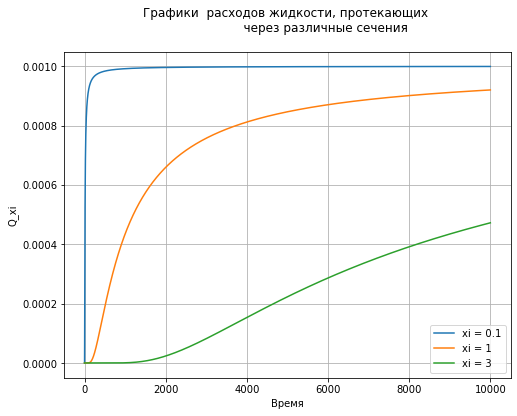

In [13]:
t = np.arange(1e-10,10000,1)
xi_1 = 0.1
xi_2 = 1
xi_3 = 3


fig,ax1 = plt.subplots(1,1) 
fig.set_size_inches(8, 6)
ax1.plot(t,q_xi_Qc_1(t,xi_1), label = 'xi = {}'.format(xi_1))
ax1.plot(t,q_xi_Qc_1(t,xi_2), label = 'xi = {}'.format(xi_2))
ax1.plot(t,q_xi_Qc_1(t,xi_3), label = 'xi = {}'.format(xi_3))


ax1.grid()
ax1.set_xlabel("Время")
ax1.set_ylabel("Q_xi")
ax1.set_title('''Графики  расходов жидкости, протекающих 
                    через различные сечения''',
                loc = 'center',     #  значение по умолчанию
                pad = 20)
ax1.legend()
plt.show()

## Графики изменения расходов жидкости, протекающих через различные сечения
## рис. 4.10

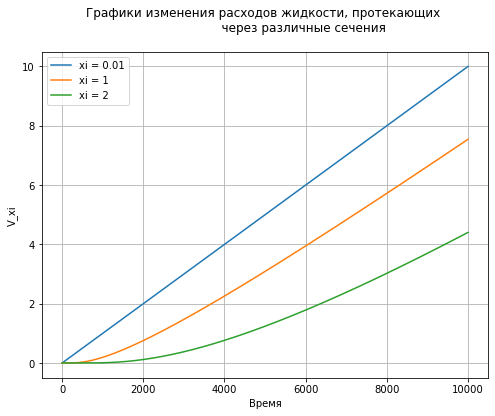

In [14]:
t = np.arange(1e-10,10000,1)
xi_1 = 0.01
xi_2 = 1
xi_3 = 2


fig,ax1 = plt.subplots(1,1) 
fig.set_size_inches(8, 6)
ax1.plot(t,v_xi_Qc_1(t,xi_1), label = 'xi = {}'.format(xi_1))
ax1.plot(t,v_xi_Qc_1(t,xi_2), label = 'xi = {}'.format(xi_2))
ax1.plot(t,v_xi_Qc_1(t,xi_3), label = 'xi = {}'.format(xi_3))


ax1.grid()
ax1.set_xlabel("Время")
ax1.set_ylabel("V_xi")
ax1.set_title('''Графики изменения расходов жидкости, протекающих 
                    через различные сечения''',
                loc = 'center',     #  значение по умолчанию
                pad = 20)
ax1.legend()
plt.show()

## Графики  расходов жидкости, протекающих через различные сечения
## рис. 4.9

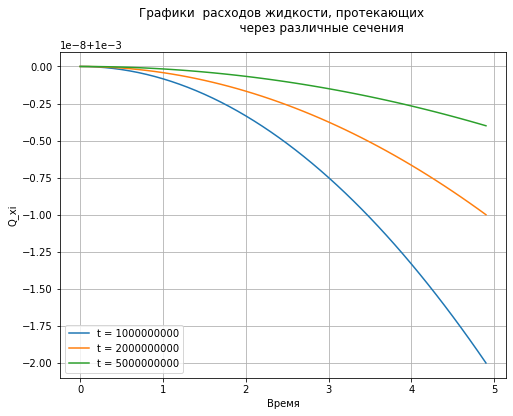

In [15]:
xi = np.arange(1e-10,5,0.1)
t_1 = 1000000000
t_2 = 2000000000
t_3 = 5000000000


fig,ax1 = plt.subplots(1,1) 
fig.set_size_inches(8, 6)
ax1.plot(xi,q_xi_Qc_1(t_1,xi), label = 't = {}'.format(t_1))
ax1.plot(xi,q_xi_Qc_1(t_2,xi), label = 't = {}'.format(t_2))
ax1.plot(xi,q_xi_Qc_1(t_3,xi), label = 't = {}'.format(t_3))


ax1.grid()
ax1.set_xlabel("Время")
ax1.set_ylabel("Q_xi")
ax1.set_title('''Графики  расходов жидкости, протекающих 
                    через различные сечения''',
                loc = 'center',     #  значение по умолчанию
                pad = 20)
ax1.legend()
plt.show()

## Учет влияния остановки стока или источника

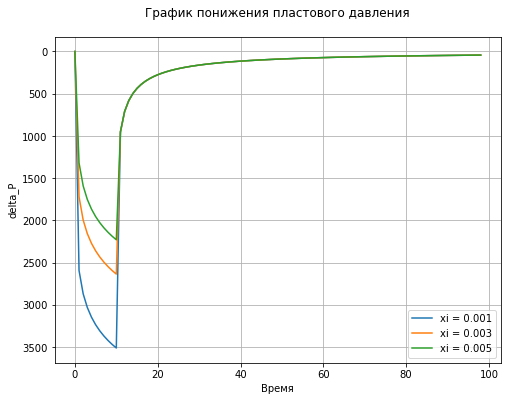

In [16]:
t1 = 10 # t1 - время отключения стока
t = np.arange(1e-10,100,1)
xi_1 = 0.001
xi_2 = 0.003
xi_3 = 0.005

df_2_wells_1 = pd.DataFrame(columns = ['time','pressure_1','pressure_2','summa'])
i = 0
for i in range(len(t)-1):
    if t[i] <= t1:
        df_2_wells_1.loc[i] = [t[i],deltaP_Qc_1(t[i],xi_1),0,deltaP_Qc_1(t[i],xi_1)]
    else:
        df_2_wells_1.loc[i] = [t[i],deltaP_Qc_1(t[i],xi_1),deltaP_Qc_1(t[i]-t1,xi_1),deltaP_Qc_1(t[i],xi_1)-deltaP_Qc_1(t[i]-t1,xi_1)]

df_2_wells_2 = pd.DataFrame(columns = ['time','pressure_1','pressure_2','summa'])
i = 0
for i in range(len(t)-1):
    if t[i] <= t1:
        df_2_wells_2.loc[i] = [t[i],deltaP_Qc_1(t[i],xi_2),0,deltaP_Qc_1(t[i],xi_2)]
    else:
        df_2_wells_2.loc[i] = [t[i],deltaP_Qc_1(t[i],xi_2),deltaP_Qc_1(t[i]-t1,xi_2),deltaP_Qc_1(t[i],xi_2)-deltaP_Qc_1(t[i]-t1,xi_2)]

df_2_wells_3 = pd.DataFrame(columns = ['time','pressure_1','pressure_2','summa'])
i = 0
for i in range(len(t)-1):
    if t[i] <= t1:
        df_2_wells_3.loc[i] = [t[i],deltaP_Qc_1(t[i],xi_3),0,deltaP_Qc_1(t[i],xi_3)]
    else:
        df_2_wells_3.loc[i] = [t[i],deltaP_Qc_1(t[i],xi_3),deltaP_Qc_1(t[i]-t1,xi_3),deltaP_Qc_1(t[i],xi_3)-deltaP_Qc_1(t[i]-t1,xi_3)]



fig,ax1 = plt.subplots(1,1) 
fig.set_size_inches(8, 6)
ax1.plot(df_2_wells_1.time,df_2_wells_1.summa, label = 'xi = {}'.format(xi_1))
ax1.plot(df_2_wells_2.time,df_2_wells_2.summa, label = 'xi = {}'.format(xi_2))
ax1.plot(df_2_wells_3.time,df_2_wells_3.summa, label = 'xi = {}'.format(xi_3))


ax1.grid()
ax1.set_xlabel("Время")
ax1.set_ylabel("delta_P")
plt.gca().invert_yaxis()
ax1.set_title('''График понижения пластового давления''',
                loc = 'center',     #  значение по умолчанию
                pad = 20)


ax1.legend()
plt.show()

## Учет влияния изменения дебита стока или источника

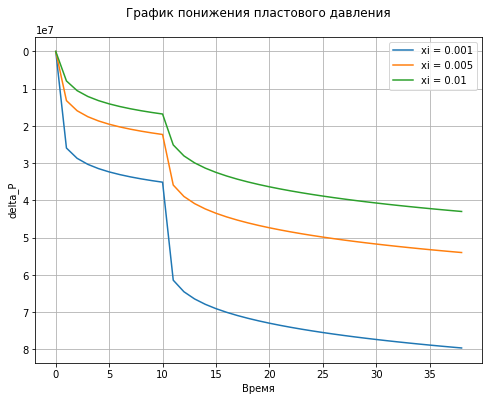

In [17]:
t1 = 10 # t1 - время отключения стока
t = np.arange(1e-10,40,1)
xi_1 = 0.001
xi_2 = 0.005
xi_3 = 0.01
q1 = 10
q2 = 20

df_2_wells_1 = pd.DataFrame(columns = ['time','pressure_1','pressure_2','summa'])
i = 0
for i in range(len(t)-1):
    if t[i] <= t1:
        df_2_wells_1.loc[i] = [t[i],deltaP_Qc_1(t[i],xi_1,q1),0,deltaP_Qc_1(t[i],xi_1,q1)]
    else:
        df_2_wells_1.loc[i] = [t[i],deltaP_Qc_1(t[i],xi_1,q1),deltaP_Qc_1(t[i]-t1,xi_1,q1-q2),deltaP_Qc_1(t[i],xi_1,q1)-deltaP_Qc_1(t[i]-t1,xi_1,q1-q2)]

df_2_wells_2 = pd.DataFrame(columns = ['time','pressure_1','pressure_2','summa'])
i = 0
for i in range(len(t)-1):
    if t[i] <= t1:
        df_2_wells_2.loc[i] = [t[i],deltaP_Qc_1(t[i],xi_2,q1),0,deltaP_Qc_1(t[i],xi_2,q1)]
    else:
        df_2_wells_2.loc[i] = [t[i],deltaP_Qc_1(t[i],xi_2,q1),deltaP_Qc_1(t[i]-t1,xi_2,q1-q2),deltaP_Qc_1(t[i],xi_2,q1)-deltaP_Qc_1(t[i]-t1,xi_2,q1-q2)]

df_2_wells_3 = pd.DataFrame(columns = ['time','pressure_1','pressure_2','summa'])
i = 0
for i in range(len(t)-1):
    if t[i] <= t1:
        df_2_wells_3.loc[i] = [t[i],deltaP_Qc_1(t[i],xi_3,q1),0,deltaP_Qc_1(t[i],xi_3,q1)]
    else:
        df_2_wells_3.loc[i] = [t[i],deltaP_Qc_1(t[i],xi_3,q1),deltaP_Qc_1(t[i]-t1,xi_3,q1-q2),deltaP_Qc_1(t[i],xi_3,q1)-deltaP_Qc_1(t[i]-t1,xi_3,q1-q2)]



fig,ax1 = plt.subplots(1,1) 
fig.set_size_inches(8, 6)
ax1.plot(df_2_wells_1.time,df_2_wells_1.summa, label = 'xi = {}'.format(xi_1))
ax1.plot(df_2_wells_2.time,df_2_wells_2.summa, label = 'xi = {}'.format(xi_2))
ax1.plot(df_2_wells_3.time,df_2_wells_3.summa, label = 'xi = {}'.format(xi_3))


ax1.grid()
ax1.set_xlabel("Время")
ax1.set_ylabel("delta_P")
plt.gca().invert_yaxis()
ax1.set_title('''График понижения пластового давления''',
                loc = 'center',     #  значение по умолчанию
                pad = 20)


ax1.legend()
plt.show()

# Группа произвольно расположенных стоков и источников

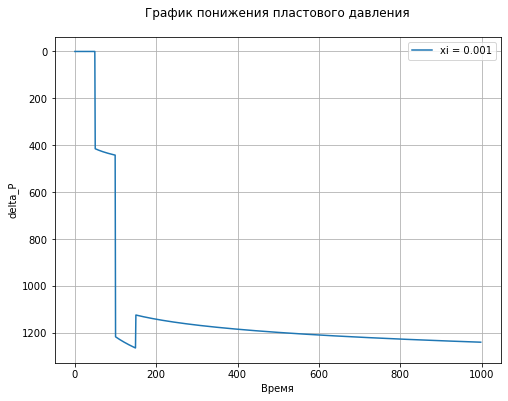

In [19]:
t1 = 10 # t1 - время отключения стока
t = np.arange(1e-10,1000,1)

tj = [50, 100, 150]
qj = [0.0001, 0.0002, -0.00015]
xij = [0.001, 0.002, 0.1]
summa = 0

df_2_wells_1 = pd.DataFrame(columns = ['time','summa'])
i = 0
for i in range(len(t)-1):
    for j in range(len(tj)):
        if t[i] <= tj[j]:
            summa += 0
        else:
            summa += deltaP_Qc_1(t[i],xij[j],qj[j])
    df_2_wells_1.loc[i] = [t[i],summa]
    summa = 0
            
fig,ax1 = plt.subplots(1,1) 
fig.set_size_inches(8, 6)
ax1.plot(df_2_wells_1.time,df_2_wells_1.summa, label = 'xi = {}'.format(xi_1))


ax1.grid()
ax1.set_xlabel("Время")
ax1.set_ylabel("delta_P")
plt.gca().invert_yaxis()
ax1.set_title('''График понижения пластового давления''',
                loc = 'center',     #  значение по умолчанию
                pad = 20)


ax1.legend()
plt.show()    
                

# Зеркальное отображение стоков и источников

# Сток - сток

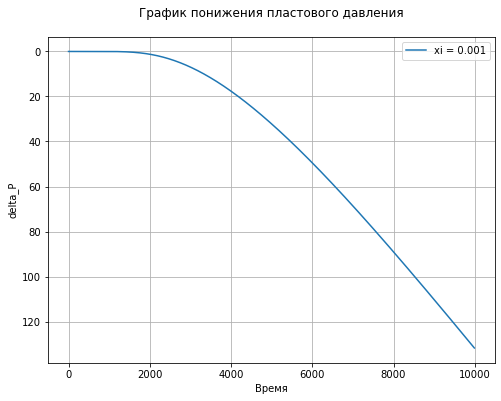

In [20]:
# M(x,y) - точка пласта, в которой определяем давление
t = np.arange(1e-11,10000,10)
x = 1
y = 1
x1 = 4
y1 = 0
x2 = -x1
y2 = -y1
r = (x ** 2 + y ** 2) ** (1 / 2)
r1 = ((x - x1) ** 2 + (y - y1) ** 2) ** (1 / 2)
r2 = ((x - x2) ** 2 + (y - y2) ** 2) ** (1 / 2)

fig,ax1 = plt.subplots(1,1) 
fig.set_size_inches(8, 6)
ax1.plot(t,deltaP_Qc_1(t,r1)+deltaP_Qc_1(t,r2), label = 'xi = {}'.format(xi_1))


ax1.grid()
ax1.set_xlabel("Время")
ax1.set_ylabel("delta_P")
plt.gca().invert_yaxis()
ax1.set_title('''График понижения пластового давления''',
                loc = 'center',     #  значение по умолчанию
                pad = 20)


ax1.legend()
plt.show()   